## 4차 과제 - Hyperparameter Tuning을 해보자
- 주제: 하이퍼파라미터 튜닝 기법 학습
- 데이터: The History of Baseball(Pitching Data) https://www.kaggle.com/datasets/seanlahman/the-history-of-baseball?select=pitching.csv
- 사용 라이브러리: pandas, numpy, matplotlib, sklearn, imblearn, bayes_opt

### 1. EDA, 전처리

1.1 분석을 위해 사용될 라이브러리들을 import 하세요.

numpy, pandas, matplotlib, SMOTE, train_test_split, RandomForestClassifier, RandomizedSearchCV, GridSearchCV, BayesianOptimization, accuracy_score

In [1]:
import pandas as pd


1.2 데이터를 불러오고 info()를 통해 데이터를 살펴보세요.

In [2]:
pitching = pd.read_csv('pitching.csv')

pitching.head()

,player_id,year,stint,team_id,league_id,w,l,g,gs,cg,...,ibb,wp,hbp,bk,bfp,gf,r,sh,sf,g_idp
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,...,NaN,NaN,NaN,0,NaN,NaN,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,...,NaN,NaN,NaN,0,NaN,NaN,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,...,NaN,NaN,NaN,0,NaN,NaN,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,...,NaN,NaN,NaN,0,NaN,NaN,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,...,NaN,NaN,NaN,0,NaN,NaN,21,NaN,NaN,NaN


In [3]:
pitching.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44139 entries, 0 to 44138
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   player_id  44139 non-null  object 
 1   year       44139 non-null  int64  
 2   stint      44139 non-null  int64  
 3   team_id    44139 non-null  object 
 4   league_id  44008 non-null  object 
 5   w          44139 non-null  int64  
 6   l          44139 non-null  int64  
 7   g          44139 non-null  int64  
 8   gs         44139 non-null  int64  
 9   cg         44139 non-null  int64  
 10  sho        44139 non-null  int64  
 11  sv         44139 non-null  int64  
 12  ipouts     44138 non-null  float64
 13  h          44139 non-null  int64  
 14  er         44139 non-null  int64  
 15  hr         44139 non-null  int64  
 16  bb         44139 non-null  int64  
 17  so         44139 non-null  int64  
 18  baopp      42614 non-null  float64
 19  era        44049 non-null  float64
 20  ibb   

1.3 null 값이 있는 컬럼은 모두 삭제하겠습니다(원래는 다른 처리를 해야 하지만 컬럼 수는 충분하니까..ㅎㅎ 야구 잘 몰라서 그런 거 아닙니다.).

In [4]:
pitching_data = pitching.dropna(axis=1)
pitching_data

,player_id,year,stint,team_id,w,l,g,gs,cg,sho,sv,h,er,hr,bb,so,bk,r
0,bechtge01,1871,1,PH1,1,2,3,3,2,0,0,43,23,0,11,1,0,42
1,brainas01,1871,1,WS3,12,15,30,30,30,0,0,361,132,4,37,13,0,292
2,fergubo01,1871,1,NY2,0,0,1,0,0,0,0,8,3,0,0,0,0,9
3,fishech01,1871,1,RC1,4,16,24,24,22,1,0,295,103,3,31,15,0,257
4,fleetfr01,1871,1,NY2,0,1,1,1,1,0,0,20,10,0,3,0,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44134,youngch03,2015,1,KCA,11,6,34,18,0,0,0,91,42,16,43,83,0,44
44135,zieglbr01,2015,1,ARI,0,3,66,0,0,0,30,48,14,3,17,36,0,17
44136,zimmejo02,2015,1,WAS,13,10,33,33,0,0,0,204,82,24,39,164,1,89
44137,zitoba01,2015,1,OAK,0,0,3,2,0,0,0,12,8,4,6,2,0,8


1.4 연도 별로 몇개의 데이터가 있는 지 확인 후 데이터가 얼마 없는 과거 데이터는 삭제하겠습니다. 이를 위해 연도 별 데이터 수를 계산하고 line plot으로 그리세요.

In [5]:
pitching_data['year'].value_counts()


2015    809
2014    746
2009    729
2013    726
2012    722
       ... 
1872     23
1878     22
1877     19
1871     19
1874     17
Name: year, Length: 145, dtype: int64

import numpy as np
import matplotlib.pyplot as plt

Year = pitching_data['year'].value_counts()


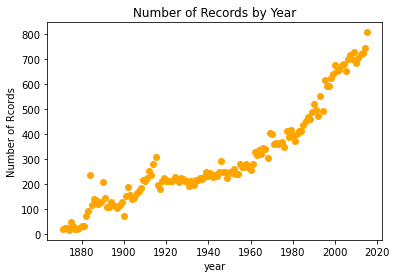

In [6]:
import numpy as np
import matplotlib.pyplot as plt

Year = [pitching_data['year'].value_counts().index]
Record = [pitching_data['year'].value_counts().values]

plt.plot(Year, Record, color = 'orange', marker = 'o', linestyle = 'solid')
plt.title('Number of Records by Year')
plt.xlabel('year')
plt.ylabel('Number of Rcords')
plt.show()

1.5 보다 최신 분석을 위해 1980년 이후의 데이터만 남기고 몇개의 데이터가 남았는지 확인하세요.

In [7]:
pitching_1980 = pitching_data[pitching_data['year'] >= 1980]

pitching_1980

,player_id,year,stint,team_id,w,l,g,gs,cg,sho,sv,h,er,hr,bb,so,bk,r
22982,aasedo01,1980,1,CAL,8,13,40,21,5,1,2,193,79,13,66,74,1,83
22983,abbotgl01,1980,1,SEA,12,12,31,31,7,2,0,228,98,27,49,78,1,110
22984,alexado01,1980,1,ATL,14,11,35,35,7,1,0,227,108,20,74,114,0,120
22985,allarbr01,1980,1,TEX,0,1,5,2,0,0,0,13,9,0,10,10,0,13
22986,allenne01,1980,1,NYN,7,10,59,0,0,0,22,87,40,7,40,79,1,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44134,youngch03,2015,1,KCA,11,6,34,18,0,0,0,91,42,16,43,83,0,44
44135,zieglbr01,2015,1,ARI,0,3,66,0,0,0,30,48,14,3,17,36,0,17
44136,zimmejo02,2015,1,WAS,13,10,33,33,0,0,0,204,82,24,39,164,1,89
44137,zitoba01,2015,1,OAK,0,0,3,2,0,0,0,12,8,4,6,2,0,8


1.6 reset_index()를 통해 재배열하세요.

In [8]:
pitching = pitching_1980.reset_index()
pitching

,index,player_id,year,stint,team_id,w,l,g,gs,cg,sho,sv,h,er,hr,bb,so,bk,r
0,22982,aasedo01,1980,1,CAL,8,13,40,21,5,1,2,193,79,13,66,74,1,83
1,22983,abbotgl01,1980,1,SEA,12,12,31,31,7,2,0,228,98,27,49,78,1,110
2,22984,alexado01,1980,1,ATL,14,11,35,35,7,1,0,227,108,20,74,114,0,120
3,22985,allarbr01,1980,1,TEX,0,1,5,2,0,0,0,13,9,0,10,10,0,13
4,22986,allenne01,1980,1,NYN,7,10,59,0,0,0,22,87,40,7,40,79,1,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21152,44134,youngch03,2015,1,KCA,11,6,34,18,0,0,0,91,42,16,43,83,0,44
21153,44135,zieglbr01,2015,1,ARI,0,3,66,0,0,0,30,48,14,3,17,36,0,17
21154,44136,zimmejo02,2015,1,WAS,13,10,33,33,0,0,0,204,82,24,39,164,1,89
21155,44137,zitoba01,2015,1,OAK,0,0,3,2,0,0,0,12,8,4,6,2,0,8


1.7 투수의 승리 수를 예측해보겠습니다. w 컬럼의 value를 확인해보세요.

In [9]:
pitching['w'].values

array([ 8, 12, 14, ..., 13,  0,  0])

In [10]:
pitching['w'].value_counts()

0     5854
1     3197
2     2356
3     1744
4     1453
5     1114
6      878
7      730
9      560
8      557
10     450
11     434
12     384
13     317
14     287
15     242
16     193
17     125
18     102
19      61
20      53
21      32
22      17
24       8
23       7
25       1
27       1
Name: w, dtype: int64

1.8 0승 투수(출전하지 않은 경우도 존재)가 많으므로 승리 수가 0인 데이터는 삭제하겠습니다.

In [11]:
pitching.drop(pitching[pitching['w'] == 0].index, inplace = True)
pitching

,index,player_id,year,stint,team_id,w,l,g,gs,cg,sho,sv,h,er,hr,bb,so,bk,r
0,22982,aasedo01,1980,1,CAL,8,13,40,21,5,1,2,193,79,13,66,74,1,83
1,22983,abbotgl01,1980,1,SEA,12,12,31,31,7,2,0,228,98,27,49,78,1,110
2,22984,alexado01,1980,1,ATL,14,11,35,35,7,1,0,227,108,20,74,114,0,120
4,22986,allenne01,1980,1,NYN,7,10,59,0,0,0,22,87,40,7,40,79,1,43
6,22988,andujjo01,1980,1,HOU,3,8,35,14,0,0,2,132,53,8,43,75,0,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21147,44129,wrighmi01,2015,1,BAL,3,5,12,9,0,0,0,52,30,9,18,26,0,30
21148,44130,wrighst01,2015,1,BOS,5,4,16,9,0,0,0,67,33,12,27,52,0,38
21151,44133,yateski01,2015,1,TBA,1,0,20,0,0,0,0,23,18,10,7,21,0,18
21152,44134,youngch03,2015,1,KCA,11,6,34,18,0,0,0,91,42,16,43,83,0,44


In [12]:
pitching['w'].value_counts()

1     3197
2     2356
3     1744
4     1453
5     1114
6      878
7      730
9      560
8      557
10     450
11     434
12     384
13     317
14     287
15     242
16     193
17     125
18     102
19      61
20      53
21      32
22      17
24       8
23       7
25       1
27       1
Name: w, dtype: int64

1.9 Regression이 아닌 Classification으로 분석해보겠습니다. 이를 위해 10을 기준으로 w를 10승 이상이면 1, 10승 미만이면 0인 Binary 형태로 변환하세요.

In [13]:
pitching['w'] = pitching['w'].apply(lambda x:1 if x >= 10 else 0)
pitching

,index,player_id,year,stint,team_id,w,l,g,gs,cg,sho,sv,h,er,hr,bb,so,bk,r
0,22982,aasedo01,1980,1,CAL,0,13,40,21,5,1,2,193,79,13,66,74,1,83
1,22983,abbotgl01,1980,1,SEA,1,12,31,31,7,2,0,228,98,27,49,78,1,110
2,22984,alexado01,1980,1,ATL,1,11,35,35,7,1,0,227,108,20,74,114,0,120
4,22986,allenne01,1980,1,NYN,0,10,59,0,0,0,22,87,40,7,40,79,1,43
6,22988,andujjo01,1980,1,HOU,0,8,35,14,0,0,2,132,53,8,43,75,0,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21147,44129,wrighmi01,2015,1,BAL,0,5,12,9,0,0,0,52,30,9,18,26,0,30
21148,44130,wrighst01,2015,1,BOS,0,4,16,9,0,0,0,67,33,12,27,52,0,38
21151,44133,yateski01,2015,1,TBA,0,0,20,0,0,0,0,23,18,10,7,21,0,18
21152,44134,youngch03,2015,1,KCA,1,6,34,18,0,0,0,91,42,16,43,83,0,44


1.10 value_counts()를 통해 잘 나눠졌는지 확인해보세요.

In [14]:
pitching['w'].value_counts()

0    12589
1     2714
Name: w, dtype: int64

1.11 종속 변수의 밸런스가 맞지 않는 것으로 확인됩니다. 이를 해결하기 위해 Under Sampling 혹은 Over Sampling 기법을 사용할 수 있는데 Under Sampling의 경우 데이터가 많지 않는 상황에서 사라지는 데이터가 과도하게 많으므로 Over Sampling 기법 중 SMOTE 기법을 사용해보겠습니다. 사용하기 전에 player_id, year, team_id 컬럼은 지우고 가겠습니다.

In [15]:
pitching = pitching.drop(['index', 'player_id', 'year', 'team_id'], axis = 1)

pitching

,stint,w,l,g,gs,cg,sho,sv,h,er,hr,bb,so,bk,r
0,1,0,13,40,21,5,1,2,193,79,13,66,74,1,83
1,1,1,12,31,31,7,2,0,228,98,27,49,78,1,110
2,1,1,11,35,35,7,1,0,227,108,20,74,114,0,120
4,1,0,10,59,0,0,0,22,87,40,7,40,79,1,43
6,1,0,8,35,14,0,0,2,132,53,8,43,75,0,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21147,1,0,5,12,9,0,0,0,52,30,9,18,26,0,30
21148,1,0,4,16,9,0,0,0,67,33,12,27,52,0,38
21151,1,0,0,20,0,0,0,0,23,18,10,7,21,0,18
21152,1,1,6,34,18,0,0,0,91,42,16,43,83,0,44


1.12 SMOTE 기법을 활용해 w의 balance를 맞추세요(sampling_strategy='auto', random_state = 123).

In [16]:
X = pitching.drop('w', axis=1)
y = pitching['w']

In [17]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = 'auto', random_state = 123)

X_over, y_over = smote.fit_resample(X, y)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트 : ', X.shape, y.shape)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트 : ', X_over.shape, y_over.shape)
print('SMOTE 적용 후 값의 분포 : \n', pd.Series(y_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트 :  (15303, 14) (15303,)
SMOTE 적용 전 학습용 피처/레이블 데이터 세트 :  (25178, 14) (25178,)
SMOTE 적용 후 값의 분포 : 
 0    12589
1    12589
Name: w, dtype: int64


1.13 balance가 잘 맞춰졌는지 확인하세요.

In [19]:
pd.Series(y_over).value_counts()

0    12589
1    12589
Name: w, dtype: int64

0    12589
1    12589
Name: w, dtype: int64


,w,l,g,gs,cg,sho,sv,h,er,hr,bb,so,bk,r,stint
0,0,13,40,21,5,1,2,193,79,13,66,74,1,83,1
1,1,12,31,31,7,2,0,228,98,27,49,78,1,110,1
2,1,11,35,35,7,1,0,227,108,20,74,114,0,120,1
3,0,10,59,0,0,0,22,87,40,7,40,79,1,43,1
4,0,8,35,14,0,0,2,132,53,8,43,75,0,59,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25173,1,14,34,34,3,0,0,267,131,24,86,139,0,142,1
25174,1,7,32,32,1,0,0,210,88,21,69,105,0,100,1
25175,1,7,29,29,4,1,0,172,68,16,52,129,1,72,1
25176,1,5,71,0,0,0,6,90,35,6,43,97,2,43,1


1.14 SMOTE의 동작 방식에 대해 작성하고 Over Sampling의 장/단점에 대해 작성하세요.

SMOTE 기법은 소수 클래ㅡ의 개체수를 늘리는 방법으로, 기존 데이터들을 적절하게 조합하여 '새로운 데이터'를 만든다.
소수 클래스 데이터 중 임의의 데이터 한 개를 기준으로 잡고 해당 데이터와 가장 가까운 거리에 있는 k개의 데이터를 찾는다.
선별된 데이터들과 처음 기준으로 잡았던 데이터와의 연결선 상에 새로운 데이터를 만들어내는 과정을 반복하는 것이다. 

![Alt text](image.png)

장점 : 통신용량이 크기 때문에 해당 데이터를 수집, 가공하는데 유연하게 대응할 수 있다.
단점 : 필요한 부품들이 하나씩 늘어나기에 비용적으로 불리하다. / 처리속도가 느리다.

1.15 다른 Over Sampling 기법들엔 어떤 것들이 있는지 작성하세요(2개 이상).

1) 언더 샘플링 : 다수의 클래스 데이터를 제거하는 방법으로, 소수 클래스와의 비율을 맞추는 기법
1-1) Random undersampling 
- 무작위로 다수 범주 데이터를 선택하여 제거하는 방법
- 매 샘플링마다 결과가 다르고, 편향 발생할 수 있음

1-2) tomek links
- 다수 클래스와 소수 클래스 사이의 tomek link를 연결하여, 연결된 다수 범주를 모두 제거하는 기법

### 2. 예측 및 분석

2.1 본격적으로 분석을 진행하겠습니다. 본 차시는 Hyperparameter Tuning에 대해 학습하는 것이 목적이므로 모델은 RandomForest Classifier 하나만 사용하도록 하겠습니다. 먼저 데이터를 train, validation, test 3개로 나누세요(trian-60%, val-20%, test-20%).

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size = 0.4, random_state = 42)

In [23]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, random_state=42)

In [26]:
print('Train set size:', len(X_train))
print('Validation set size:', len(X_val))
print('Test set size:', len(X_test))

Train set size: 15106
Validation set size: 5036
Test set size: 5036


2.2 train test에 validation set을 추가하는 이유가 뭔지 작성하세요.

validation set은 학습이 끝난 모델에 적용시켜 test set을 이용한 모델의 평가로 넘어가이 이전에 최종적으로 모델을 Fine tuning 하는데에 사용한다.
만든 모델이 test set과 실제로 배포되었을 때 높은 성능을 낼 수 있도록 만들어준다. 

2.3 Randomized SearchCV로 최적의 파라미터 셋을 찾으세요(성능 지표는 accuracy score).

In [64]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

In [61]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

In [79]:
rf = RandomForestClassifier(random_state=123)
rs = RandomizedSearchCV(estimator=rf,
                        param_distributions=param_grid,
                        scoring= 'accuracy',
                        random_state=123)

rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=123),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200]},
                   random_state=123, scoring='accuracy')

2.4 위에서 지정한 hyperparameter들이 각각 무엇을 의미하는지 작성하세요.

1) estimator : classifier, regressor, pipeline 모델이 들어가는 곳
2) max_depth : 트리의 최대 깊이
3) min_samples_split : 분할 할 수 있는 샘플 수 지정
4) min_samples_leaf : 분할해서 leaf가 될 수 있는 샘플 수 지정
5) bootstrap : 전체 데이터에서 일부 데이터의 중첩을 허용함
6) criterion : 복잡성 계산 방법

2.5 Grid SearchCV로 최적의 파라미터 셋을 찾으세요.

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier()

In [83]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

In [86]:
rf = RandomForestClassifier(random_state=123)
gs = GridSearchCV(estimator=rf,
                  param_grid = param_grid,
                  scoring= 'accuracy',
                  cv = 5)

rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=123),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200]},
                   random_state=123, scoring='accuracy')

2.6 Randomized SearchCV와 Grid SearchCV의 차이와 장단점에 대해 설명하세요.

<figure>
    <img src="https://miro.medium.com/v2/resize:fit:781/1*8uSZqUSGa-UGF-0CDBd4Jw.png">
</figure>

1) GridSearchCV() : 모든 조합에 대해 교차검증 후 가장 좋은 성능을 내는 하이퍼파라미터 조합을 찾음 / 하이퍼파라미터 값이 많아지면 시간이 오래 걸림
2) RandomomizedSearchCV() : 모든 조합을 다 시도하는 것이 아닌, 각 반복마다 임의의 값만 대입해 지정한 횟수만큼 평가함

2.7 이번엔 Bayesian Optimization을 사용해 파라미터 튜닝을 진행해보겠습니다.

In [89]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

In [90]:
param_bounds = {'max_depth': (4, 8),
'subsample': (0.6, 0.9),
'colsample_bytree': (0.7, 1.0),
'min_child_weight': (5, 7),
'gamma': (8, 11),
'reg_alpha': (7, 9),
'reg_lambda': (1.1, 1.5)}

In [91]:
from sklearn.metrics import roc_auc_score

def eval_function(max_depth, subsample, colsample_bytree, min_child_weight, gamma, reg_alpha, reg_lambda):
  param_bounds = {'max_depth': max_depth,
                  'subsample': subsample,
                  'colsample_bytree': colsample_bytree,
                  'min_child_weight': min_child_weight,
                  'gamma': gamma,
                  'reg_alpha': reg_alpha,
                  'reg_lambda': reg_lambda}
  xgb_model = xgb.train(params=params, dtrain=train, num_boost_round=2000, evals=[(valid, 'valid')], maximize=True, early_stopping_round=200)
  best_iter = xgb_model.best_iteration
  preds = xgb_model.predict(valid, iteration_range=(0, best_iter))
  score = roc_auc_score(y_valid, preds)

  return score

In [92]:
from bayes_opt import BayesianOptimization

optimizer = BayesianOptimization(f=eval_function, pbounds=param_bounds)

optimizer.maximize(init_points=3, n_iter=10)


ImportError: cannot import name 'just_fix_windows_console' from 'colorama' (/Users/kimsunhwa/opt/anaconda3/lib/python3.9/site-packages/colorama/__init__.py)

2.8 진행한 튜닝 과정에서 찾은 최적의 파라미터 셋으로 다시 학습을 진행한 후 최종 accuracy score을 출력하세요.

### 3. 자유분석

최적의 파라미터 셋을 찾고 성능을 높여보세요.